In [1]:
# ==========================================
# STEP 1: IMPORT BASIC LIBRARIES
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")


In [15]:
# ==========================================
# STEP 2: CREATE SYNTHETIC DATASET
# ==========================================

np.random.seed(42)
n = 1000

data = pd.DataFrame({
    "Amount": np.random.randint(100, 100000000, n),
    "Time": np.random.randint(0, 24, n),
    "Location": np.random.choice(["Urban", "Rural", "International"], n),
    "Frequency": np.random.randint(1, 20, n)
})

# Fraud rule logic
data["Risk"] = np.where(
    (data["Amount"] > 40000) |
    (data["Frequency"] > 12) |
    ((data["Time"] < 4) & (data["Amount"] > 30000)),
    1, 0
)


data.head()


,Amount,Time,Location,Frequency,Risk
0,65682967,5,Rural,18,1
1,56755136,21,Urban,5,1
2,56882382,16,Rural,3,1
3,21081888,23,Rural,5,1
4,13315192,5,International,17,1


In [3]:
# ==========================================
# STEP 3: DATA PREPROCESSING
# ==========================================

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Location"] = le.fit_transform(data["Location"])

X = data.drop("Risk", axis=1)
y = data["Risk"]


In [4]:
# ==========================================
# STEP 4: FEATURE SCALING
# ==========================================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# ==========================================
# STEP 5: TRAIN-TEST SPLIT
# ==========================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [6]:
# ==========================================
# STEP 6: DECISION TREE MODEL
# ==========================================

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)


In [7]:
# ==========================================
# STEP 7: MODEL EVALUATION
# ==========================================

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.985

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       189
           1       1.00      0.73      0.84        11

    accuracy                           0.98       200
   macro avg       0.99      0.86      0.92       200
weighted avg       0.99      0.98      0.98       200



In [8]:
# ==========================================
# STEP 8: LOGISTIC REGRESSION MODEL
# ==========================================

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.96


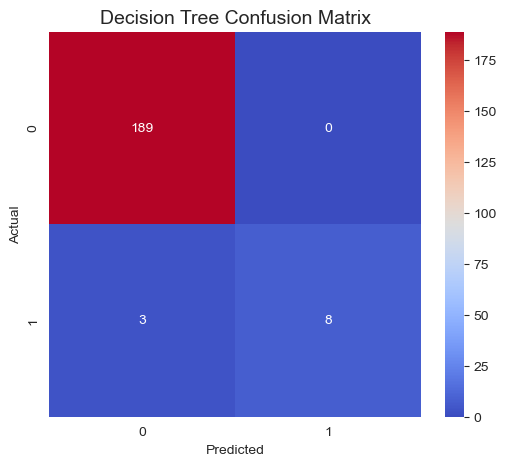

In [9]:
# ==========================================
# STEP 9: CONFUSION MATRIX VISUALIZATION
# ==========================================

cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title("Decision Tree Confusion Matrix", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


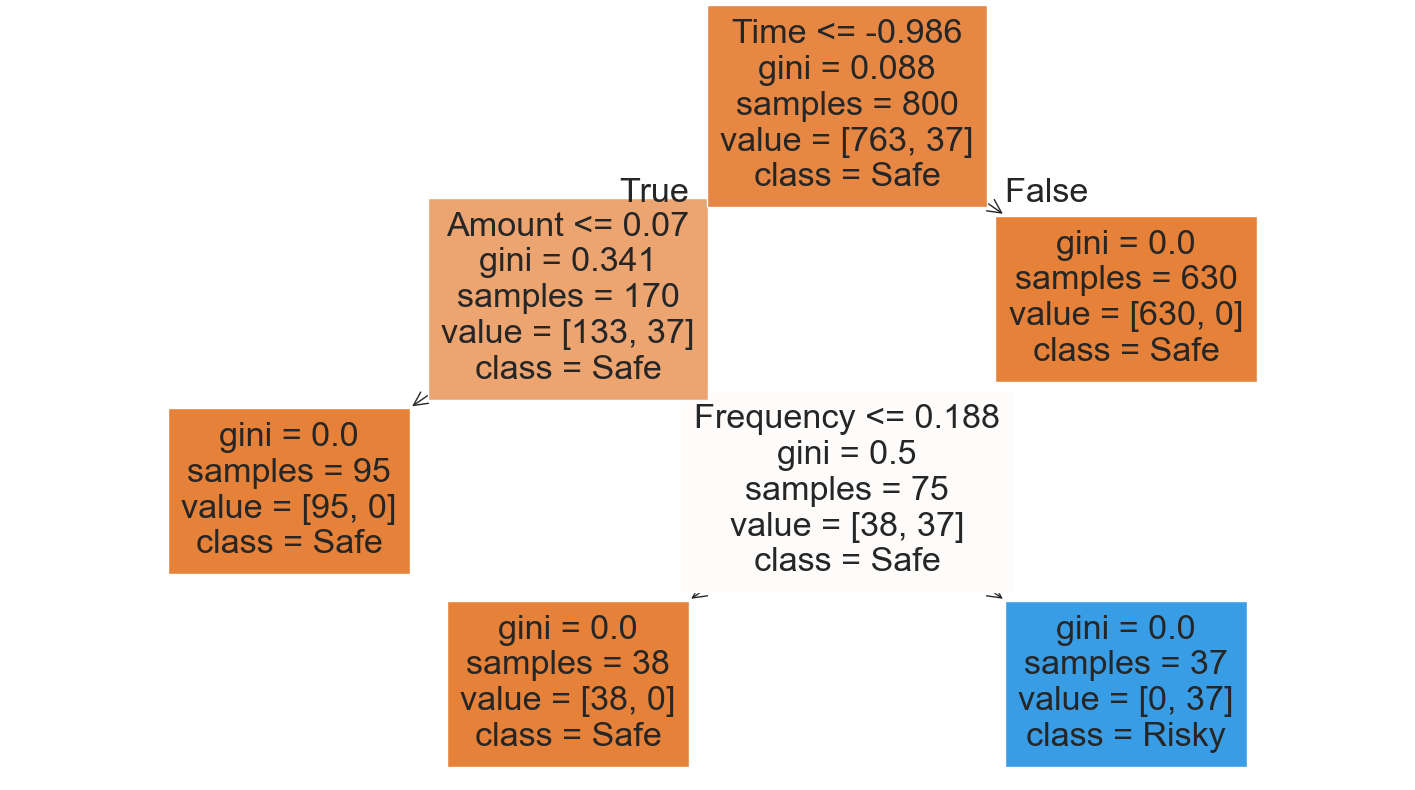

In [10]:
# ==========================================
# STEP 10: VISUALIZE DECISION TREE
# ==========================================

from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=["Safe", "Risky"],
          filled=True)
plt.show()


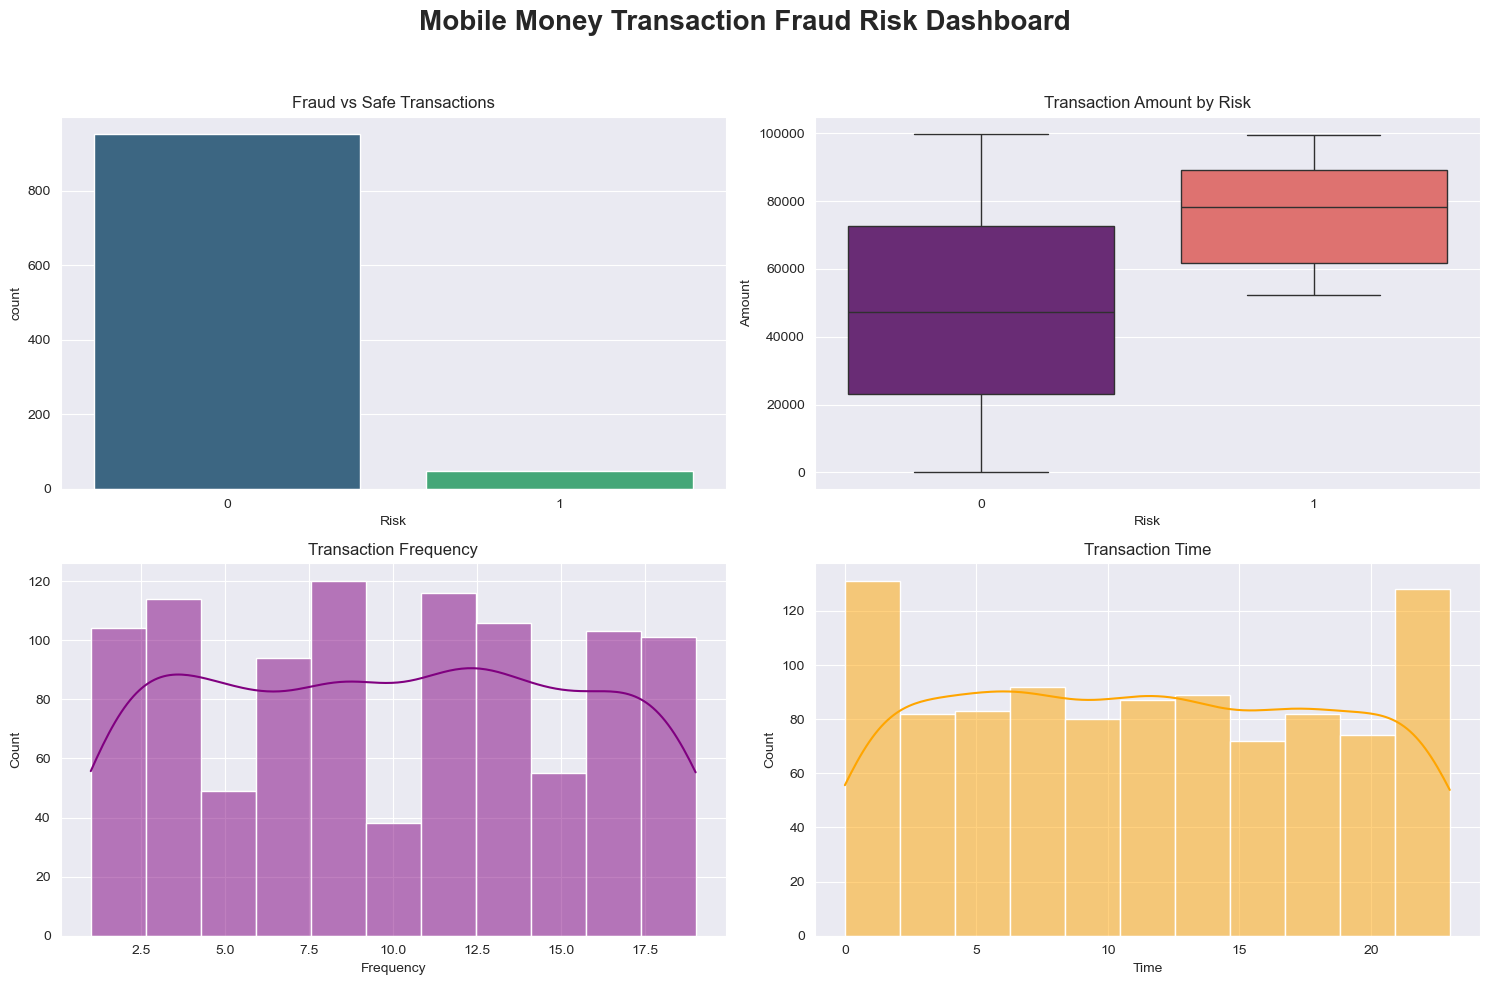

In [11]:
# ==========================================
# STEP 11: FRAUD ANALYSIS DASHBOARD
# ==========================================

plt.figure(figsize=(15,10))
plt.suptitle("Mobile Money Transaction Fraud Risk Dashboard",
             fontsize=20, fontweight='bold')

# Fraud Distribution
plt.subplot(2,2,1)
sns.countplot(x=data["Risk"], palette="viridis")
plt.title("Fraud vs Safe Transactions")

# Amount by Risk
plt.subplot(2,2,2)
sns.boxplot(x=data["Risk"], y=data["Amount"], palette="magma")
plt.title("Transaction Amount by Risk")

# Frequency
plt.subplot(2,2,3)
sns.histplot(data["Frequency"], kde=True, color="purple")
plt.title("Transaction Frequency")

# Time Distribution
plt.subplot(2,2,4)
sns.histplot(data["Time"], kde=True, color="orange")
plt.title("Transaction Time")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [12]:
# ==========================================
# STEP 12: REAL-TIME PREDICTION FUNCTION
# ==========================================

def predict_transaction(amount, time, location, frequency):

    location_encoded = le.transform([location])[0]

    input_data = pd.DataFrame({
        "Amount": [amount],
        "Time": [time],
        "Location": [location_encoded],
        "Frequency": [frequency]
    })

    input_scaled = scaler.transform(input_data)

    prediction = dt_model.predict(input_scaled)[0]
    probability = dt_model.predict_proba(input_scaled)[0][1]

    if prediction == 1:
        print(f"⚠ HIGH RISK (Fraud Probability: {probability:.2f})")
    else:
        print(f"✅ SAFE (Fraud Probability: {probability:.2f})")


# Example test
predict_transaction(80000, 2, "International", 15)


⚠ HIGH RISK (Fraud Probability: 1.00)


In [13]:
# ==========================================
# SAVE TRAINED MODEL
# ==========================================

import pickle

# Save Decision Tree model
with open("model.pkl", "wb") as file:
    pickle.dump(dt_model, file)

# Save scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

# Save label encoder
with open("encoder.pkl", "wb") as file:
    pickle.dump(le, file)

print("Model, scaler, and encoder saved successfully!")


Model, scaler, and encoder saved successfully!
